# Example usage of ResultsDrawer class

In [1]:
%pylab inline
from IPython.display import display

import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.WARNING)

import sys, os

# os.system("python -m io3d -l 3Dircadb1.1")
DATA_PATH = "3Dircadb1.1/PATIENT_DICOM"
import io3d

#PKG_PATH = "~/projects/bodynavigation"
PKG_PATH = "~/Programming/Sources/bodynavigation"
sys.path.append(os.path.expanduser(PKG_PATH))
from bodynavigation.results_drawer import ResultsDrawer
from bodynavigation.organ_detection import OrganDetection

Populating the interactive namespace from numpy and matplotlib


## Produce some data to test with

In [2]:
data3d, metadata = io3d.datareader.read(io3d.datasets.join_path(DATA_PATH), dataplus_format=False)
voxelsize = metadata["voxelsize_mm"]
obj = OrganDetection(data3d, voxelsize)
masks = [ obj.getPart(p) for p in ["bones","lungs","kidneys"] ]
bones_stats = obj.analyzeBones()
points = [bones_stats["spine"], bones_stats["hips_start"]]

## Basic
Transparent and overlapping:

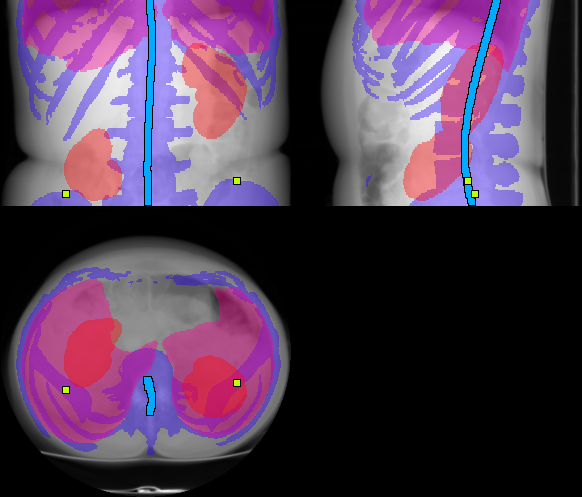

In [3]:
rd = ResultsDrawer(default_volume_alpha = 100)
img = rd.drawImageAutocolor(data3d, voxelsize, volumes = masks, points = points)
display(img) #img.show()

Solid with depth:

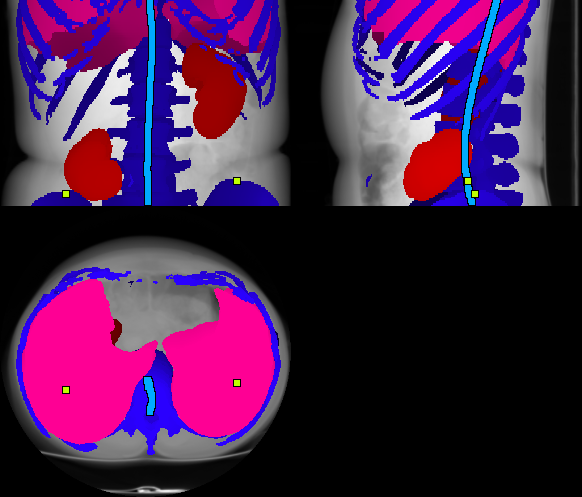

In [4]:
rd = ResultsDrawer(mask_depth = True, default_volume_alpha = 255)
img = rd.drawImageAutocolor(data3d, voxelsize, volumes = masks, points = points)
display(img) #img.show()

Drawn image can be shown with: img.show()

Drawn image can be saved with: img.save("./img.png")

## Advanced
### Inicialization options

These values are used for transformation of dicom values to <0;255> value range. 

In [5]:
data3d_forced_min = -1024; data3d_forced_max = 1024

These are default values that are used if user does not give them.

In [6]:
default_volume_alpha = 100; default_point_alpha = 255; default_point_border = (0,0,0); default_point_size = 5

Following enables displaying depth of segmented data, enables only drawing parts of masks that are not hidden behind other masks, and defines how fast does color darken in depth mode. (mask_depth_sort is forced True if mask_depth=True)

In [7]:
mask_depth = False; mask_depth_sort = False; mask_depth_scale = 0.75

### Custom colors and point sizes

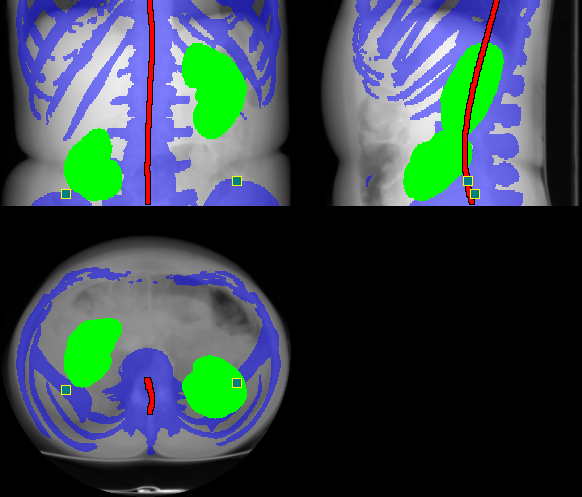

In [8]:
volume_sets = []
volume_sets.append([obj.getPart("bones"), {"color":(0,0,255)}])
volume_sets.append([obj.getPart("kidneys"), {"color":(0,255,0,255)}])

point_sets = []
point_sets.append([bones_stats["spine"], {"color":(255,0,0), "size":3}])
point_sets.append([bones_stats["hips_start"], {"color":(0,128,128), "size":7, "border":(255,255,0)}])

rd = ResultsDrawer(default_volume_alpha = 128)
img = rd.drawImage(data3d, voxelsize, volume_sets = volume_sets, point_sets = point_sets)
display(img) #img.show()

You can also use predefined RGB/RGBA colors:

In [9]:
print( rd.getRGBA(0) )
print( rd.getRGBA(0, a=128) )

(43, 0, 255)
(43, 0, 255, 128)
